In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
%matplotlib inline
import seaborn as sns

### Introduction
<a href='https://docs.google.com/forms'>Google Forms</a> is a service that allows you to collect information via simple web forms. One of the useful features is that the forms will automatically save your data to a Google Sheet. This tutorial will walk through how to create a form and read all the responses into your notebook.

Before going too far, if you would like to take the short survey, here is the <a href='https://docs.google.com/a/thrive.to/forms/d/1cN978B7AYyS4lHSrLwaeAvyDRYkeZu48fGFt7EVvW7w/viewform?c=0&w=1'>link</a> to the survey we will discuss.

Why would someone want to use pandas to read a Google Sheet? The key functionality this setup provides is a simple way to allow a large number of people to provide you information (don’t just think of a standard survey) and collect it all in a single place. You can then analyze the data with the full power of python and pandas. Google takes care of making sure that all the data gets consistently entered into one clean format - no matter how many people access the form.

### Form Creation
The first part of the process is creating the Form. If you haven’t used Forms before, go to <a href='https://www.google.com/forms/about/'>Google Forms</a> to learn more about the service and what it can be used for.

Once you decide to create your form, you’ll be shown a screen similar to this:

<img src="http://pbpython.com/images/empty-form.png"/>

Go ahead and create a Form. It is all fairly intuitive.

The main thing you need to pay attention to is the name of the form. In this case - Thrive Google Forms Example.

When you are ready, you can publish the survey by clicking on the Send form button. Here is the <a href='https://docs.google.com/a/thrive.to/forms/d/1cN978B7AYyS4lHSrLwaeAvyDRYkeZu48fGFt7EVvW7w/viewform?c=0&w=1'>link</a> to the survey for this site.

Now that you have the basic form set up, it is ready to store your data in a Google Sheet. The next step is setting up access so that your python script can connect to Google and download the data.

### Sharing the Google Sheet
Go into your drive and enable sharing of that response sheet to the email you have listed.

From your <a href='https://drive.google.com/'>Google Drive</a>, find the response spreadsheet. In this case, "Thrive Google Forms Example" and copy the Share-Link:

<img src="https://dl.dropboxusercontent.com/u/7127592/Thrive_GDrive_Share_SSheet.png"/>


### Import the data into Thrive
Now replace the link with the one used here (googlelink = [insert link]) - it has to be enclosed by an apostrophe.
After you run the cell the command ```df.head()``` will give print you the column headers and the first five rows.

In [2]:
googlelink = 'https://docs.google.com/spreadsheets/d/1HGcp52rc4ZpwO1VjM1X2Ec1xvRz8pYd9yhYfFofmfz0/edit?usp=sharing'
df = pd.read_csv(googlelink[:-16]+'export?format=csv')
df.head()

,Timestamp,Are you male or female,How often do you use Thrive per week?,How frequently do you use the following tools? [Python],How frequently do you use the following tools? [R],How frequently do you use the following tools? [Stata],How frequently do you use the following tools? [SPSS],How frequently do you use the following tools? [Mathlab],How frequently do you use the following tools? [Excel],Which python distribution do you primarily use?,How would you like to be notified about new content on Thrive?,What suggestions do you have for future content?,What is your yearly income?
0,11/29/2015 19:41:26,male,12,A couple times a week,Once a month,Never,Never,Never,Never,Thrive,Facebook,more content!,130478
1,11/29/2015 20:07:12,male,9,Daily,Daily,Once a month,A couple times a week,Never,Never,Thrive,Notification in Thrive,none,131959
2,11/28/2015 19:41:26,male,12,A couple times a week,Once a month,Never,Never,Never,Never,Thrive,Facebook,more content!,113744
3,11/27/2015 19:41:26,female,2,A couple times a week,Once a month,Never,Never,Never,Never,Thrive,Facebook,more content!,136543
4,11/26/2015 19:41:26,male,2,A couple times a week,Once a month,Never,Never,Never,Never,Thrive,Facebook,more content!,46220


## Visualize you data

### Barplot
Lets say you want to display a barplot which shows you how many males and females did participate in the survey. First you have to group the specific column and count their answers. Then you can plot your bars with the function ```sns.barplot()```

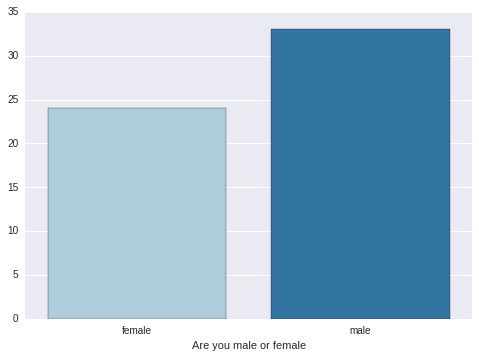

In [3]:
sex=df.groupby(['Are you male or female'])['Are you male or female'].count()
sns.barplot(sex.index, sex.values, ci=None, palette="Paired", hline=.1,)

### Scatterplot
Now we want to find a correlation between the frequency you use Thrive per week and your yearly income. We use the function ```df.plot()``` with three parameters:
1. Which kind of plot it should be, in this case a scatter plot
2. The first attribute which we want to plotted on the x-axis
3. The 2nd attribte which we want to be plotted on the y-axis

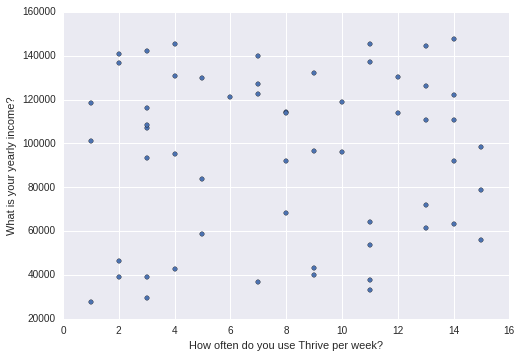

In [4]:
df.plot(kind='scatter', x='How often do you use Thrive per week?', y='What is your yearly income?')

As we can see in the scatterplot, there should be no clear correlation between those attributes. To get the correlation between those two attributes we can use the function ```df.corr()``` function. Before that we have to define the attributes in the squared brackets:

In [5]:
df[['How often do you use Thrive per week?','What is your yearly income?']].corr()

,How often do you use Thrive per week?,What is your yearly income?
How often do you use Thrive per week?,1.000000,0.045468
What is your yearly income?,0.045468,1.000000
